# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key
from datetime import date
import time

# Define today's date
today = date.today()

## Generate Cities List

In [39]:
# Generate 700 latitudes and longitudes using random number generator and multiply by 100
cities_df = pd.DataFrame({"Long":(np.random.uniform(-1.8,1.8,700)*100), "Lat":(np.random.uniform(-0.9,0.9,700)*100)})

# Create empty list for city names
city_names = []
countries = []

# Use Citipy to identify city closest to each latitude and longtitude
for i in range(0,len(cities_df["Lat"])):
    lat = cities_df.iloc[i]["Lat"]
    long = cities_df.iloc[i]["Long"]
    city = citipy.nearest_city(lat,long)
    name = city.city_name
    city_names.append(name)
    country = city.country_code
    countries.append(country)
    
# Add city names list to data frame
cities_df["City"] = city_names
cities_df["Country"] = countries

# Display data frame
cities_df.sort_values(by=["City"])

,Long,Lat,City,Country
549,-74.563302,-17.267760,acari,pe
52,-1.054830,30.244238,adrar,dz
198,170.302723,-37.564786,ahipara,nz
460,-157.359924,22.774472,ahuimanu,us
505,145.079305,16.852478,airai,pw
...,...,...,...,...
364,132.178277,43.586486,zavodskoy,ru
41,99.267341,38.681540,zhangye,cn
276,103.457963,58.711587,zheleznodorozhnyy,ru
488,69.405648,48.622079,zhezkazgan,kz


In [40]:
cities_df["City"].nunique()

368

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create empty list for weather
cities_clean = []
country_clean = []
lat_clean = []
lon_clean = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
date = []

# Print first lines of print log
print("-----------------------------")
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for i in range(0,len(cities_df["Lat"])):
   
    # Grab city name and country code from data frame to use in URL
    time.sleep(1.1)
    city_name = cities_df.iloc[i]["City"]
    country_code = cities_df.iloc[i]["Country"]
    
    # Build URL for current city
    response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}&units=imperial&appid={weather_api_key}").json()
    
    # Add temperature information to lists; also skip cities that cannot be found
    try:
        cities_clean.append(response['name'])
        country_clean.append(response['sys']["country"])
        lat_clean.append(response['coord']['lat'])
        lon_clean.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']["all"])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        
        # Print city names that could be found
        print(f"Processing record {i} | {city_name}")
        
    except:
        
        # Print error message when city was not found
        print("City not found. Skipping to next record.")

# Print final lines of print log
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval
-----------------------------
Processing record 0 | pensacola
City not found. Skipping to next record.
Processing record 2 | thompson
Processing record 3 | ponta do sol
Processing record 4 | mnogovershinnyy
Processing record 5 | puerto ayora
City not found. Skipping to next record.
Processing record 7 | nelson bay
Processing record 8 | whitehorse
Processing record 9 | darhan
Processing record 10 | cabo san lucas
Processing record 11 | vredendal
Processing record 12 | tuktoyaktuk
City not found. Skipping to next record.
Processing record 14 | talcahuano
Processing record 15 | tazovskiy
Processing record 16 | carnarvon
Processing record 17 | pangnirtung
Processing record 18 | guabito
Processing record 19 | thompson
Processing record 20 | rikitea
Processing record 21 | dingle
Processing record 22 | cidreira
Processing record 23 | rikitea
Processing record 24 | jamestown
Processing record 25 | turinskaya sloboda
Processing record 26 | 

Processing record 239 | sitka
Processing record 240 | bluff
Processing record 241 | lashio
Processing record 242 | verkhnevilyuysk
Processing record 243 | tuatapere
Processing record 244 | sawang daen din
Processing record 245 | hilo
Processing record 246 | vaini
Processing record 247 | ushuaia
Processing record 248 | cao bang
Processing record 249 | narsaq
Processing record 250 | candolim
Processing record 251 | gualaquiza
Processing record 252 | longyearbyen
Processing record 253 | hermanus
Processing record 254 | ushuaia
Processing record 255 | hithadhoo
City not found. Skipping to next record.
Processing record 257 | high level
Processing record 258 | narsaq
Processing record 259 | nikolskoye
Processing record 260 | ponta do sol
Processing record 261 | lagoa
Processing record 262 | piacabucu
City not found. Skipping to next record.
Processing record 264 | vallenar
Processing record 265 | ushuaia
Processing record 266 | lazaro cardenas
Processing record 267 | mosquera
Processing rec

City not found. Skipping to next record.
Processing record 481 | sisimiut
Processing record 482 | port elizabeth
Processing record 483 | toora-khem
Processing record 484 | saldanha
Processing record 485 | karratha
Processing record 486 | la ronge
Processing record 487 | dabat
Processing record 488 | gudibanda
Processing record 489 | rikitea
Processing record 490 | cape town
Processing record 491 | castro
Processing record 492 | butaritari
Processing record 493 | marienburg
Processing record 494 | venice
Processing record 495 | rikitea
City not found. Skipping to next record.
City not found. Skipping to next record.
Processing record 498 | port lincoln
City not found. Skipping to next record.
Processing record 500 | puerto ayora
Processing record 501 | tucurui
Processing record 502 | maceio
Processing record 503 | lompoc
Processing record 504 | bredasdorp
Processing record 505 | vallenar
Processing record 506 | rikitea
Processing record 507 | vardo
Processing record 508 | rikitea
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create and display a data frame from the weather records of found cities
weather_dict = {
    "City": cities_clean,
    "Latitude": lat_clean,
    "Longitude": lon_clean,
    "Max Temp (F)": temperature,
    "Humidity %": humidity,
    "Cloudiness %": cloudiness,
    "Wind Speed (mph)": wind_speed,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

# Export city data as a CSV
weather_data.to_csv("Output/Weather_Data.csv", index=False, header=True)

In [5]:
weather_data.describe()

,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Date
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,6.170000e+02
mean,5.479627,-9.647877,59.641767,75.656402,59.844408,9.462026,1.602987e+09
std,39.047196,101.866934,19.371844,18.128024,39.287135,6.027380,2.756892e+02
min,-54.800000,-179.170000,5.290000,7.000000,0.000000,0.090000,1.602986e+09
25%,-26.650000,-97.860000,46.040000,67.000000,20.000000,4.700000,1.602987e+09
50%,-0.740000,-14.420000,64.000000,80.000000,75.000000,8.050000,1.602987e+09
75%,41.370000,78.700000,74.620000,88.000000,97.000000,13.940000,1.602987e+09
max,78.220000,178.420000,96.800000,100.000000,100.000000,31.470000,1.602988e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data = weather_data[weather_data["Humidity %"] <= 100]
weather_data

,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Date
0,Pensacola,30.42,-87.22,64.00,67,1,9.22,1602986549
1,Thompson,55.74,-97.86,28.40,100,90,2.24,1602986555
2,Ponta do Sol,17.20,-25.09,80.60,83,20,12.75,1602986769
3,Mnogovershinnyy,53.94,139.92,35.67,82,99,1.57,1602986770
4,Puerto Ayora,-0.74,-90.35,71.01,86,92,5.99,1602986771
...,...,...,...,...,...,...,...,...
612,Torbay,47.67,-52.73,48.99,100,90,16.11,1602987430
613,Mount Isa,-20.73,139.50,95.00,24,0,10.29,1602987436
614,Fernley,39.61,-119.25,66.99,27,0,1.01,1602987601
615,Atuona,-9.80,-139.03,78.40,74,0,13.94,1602987413


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The below graph shows the relationship between a city's latitude and its temperature.
For our initial conjecture (that the earth is warmer near the equater) to be true
we would expect to see warmer temperatures near the equator (0' latitude) and cooler
temperatures as the latitude's absolute value increases.


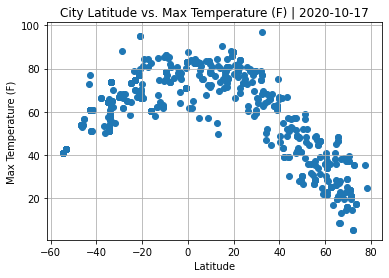

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Max Temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature (F) | {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Explain what the code is analyzing
print("The below graph shows the relationship between a city's latitude and its temperature.")
print("For our initial conjecture (that the earth is warmer near the equater) to be true")
print("we would expect to see warmer temperatures near the equator (0' latitude) and cooler")
print("temperatures as the latitude's absolute value increases.")

# Save the figure
plt.savefig("Images/Latitude_VS_Temperature.png")

## Latitude vs. Humidity Plot

The below graph shows the relationship between a city's latitude and its humidity.
Humidity measures the concentration of moisture in the air, which is not generally
believed to be related to latitude.


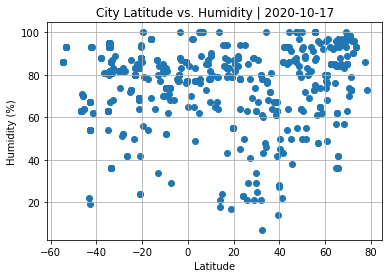

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity %"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity | {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Explain what the code is analyzing
print("The below graph shows the relationship between a city's latitude and its humidity.")
print("Humidity measures the concentration of moisture in the air, which is not generally")
print("believed to be related to latitude.")

# Save the figure
plt.savefig("Images/Latitude_VS_Humidity.png")

## Latitude vs. Cloudiness Plot

The below graph shows the relationship between a city's latitude and its cloudiness.
Cloudiness is not generally believed to be related to latitude.


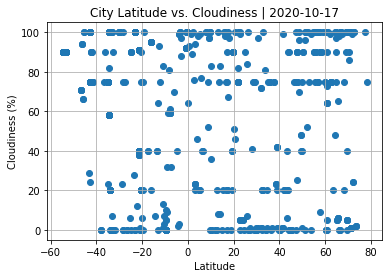

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness %"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness | {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Explain what the code is analyzing
print("The below graph shows the relationship between a city's latitude and its cloudiness.")
print("Cloudiness is not generally believed to be related to latitude.")

# Save the figure
plt.savefig("Images/Latitude_VS_Cloudiness.png")

## Latitude vs. Wind Speed Plot

The below graph shows the relationship between a city's latitude and its wind speed.
Wind speed is not generally believed to be related to latitude.


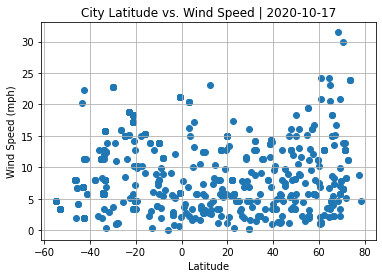

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed | {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Explain what the code is analyzing
print("The below graph shows the relationship between a city's latitude and its wind speed.")
print("Wind speed is not generally believed to be related to latitude.")

# Save the figure
plt.savefig("Images/Latitude_VS_Wind Speed.png")

## Linear Regression

In [11]:
# Pull cities in the northern hemisphere into a new data frame
cities_north_df = weather_data[weather_data["Latitude"] >= 0]
cities_north_df.head()

,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Date
0,Pensacola,30.42,-87.22,64.00,67,1,9.22,1602986549
1,Thompson,55.74,-97.86,28.40,100,90,2.24,1602986555
2,Ponta do Sol,17.20,-25.09,80.60,83,20,12.75,1602986769
3,Mnogovershinnyy,53.94,139.92,35.67,82,99,1.57,1602986770
6,Whitehorse,60.72,-135.05,23.00,49,5,6.93,1602986487


In [12]:
# Pull cities in the souther hemisphere into a new data frame
cities_south_df = weather_data[weather_data["Latitude"] < 0]
cities_south_df.head()

,City,Latitude,Longitude,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Date
4,Puerto Ayora,-0.74,-90.35,71.01,86,92,5.99,1602986771
5,Nelson Bay,-32.72,152.15,70.00,68,90,13.87,1602986773
9,Vredendal,-31.67,18.50,54.88,89,0,2.91,1602986778
11,Talcahuano,-36.72,-73.12,53.60,81,75,2.24,1602986782
13,Carnarvon,-24.87,113.63,73.40,73,90,14.99,1602986785


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8950701544434464


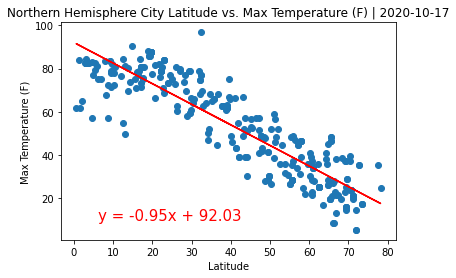

In [13]:
# Build a scatter plot for each data type
plt.scatter(cities_north_df["Latitude"], cities_north_df["Max Temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature (F) | {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_north_df["Latitude"]
y_values = cities_north_df["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/NH_Latitude_VS_Temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7999101148768964


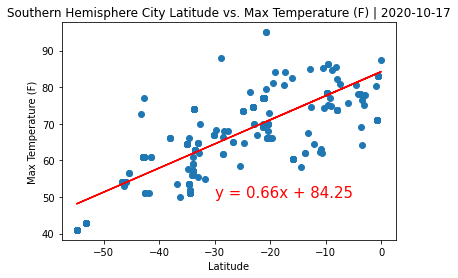

In [14]:
# Build a scatter plot for each data type
plt.scatter(cities_south_df["Latitude"], cities_south_df["Max Temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature (F) | {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_south_df["Latitude"]
y_values = cities_south_df["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/SH_Latitude_VS_Temperature.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17504909662466206


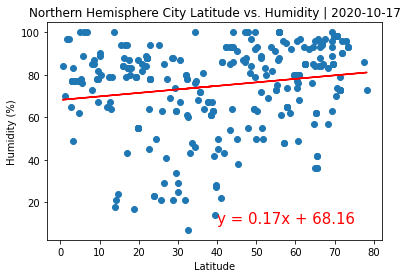

In [15]:
# Build a scatter plot for each data type
plt.scatter(cities_north_df["Latitude"], cities_north_df["Humidity %"], marker="o")

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere City Latitude vs. Humidity | {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_north_df["Latitude"]
y_values = cities_north_df["Humidity %"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/NH_Latitude_VS_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.008716349189620299


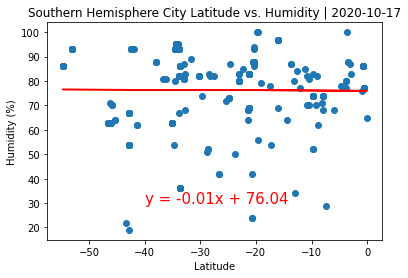

In [24]:
# Build a scatter plot for each data type
plt.scatter(cities_south_df["Latitude"], cities_south_df["Humidity %"], marker="o")

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere City Latitude vs. Humidity | {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_south_df["Latitude"]
y_values = cities_south_df["Humidity %"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/SH_Latitude_VS_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.055375347722622946


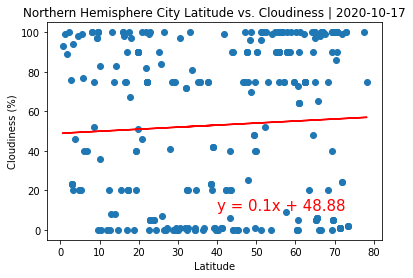

In [17]:
# Build a scatter plot for each data type
plt.scatter(cities_north_df["Latitude"], cities_north_df["Cloudiness %"], marker="o")

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness | {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_north_df["Latitude"]
y_values = cities_north_df["Cloudiness %"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/NH_Latitude_VS_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.17939898275338492


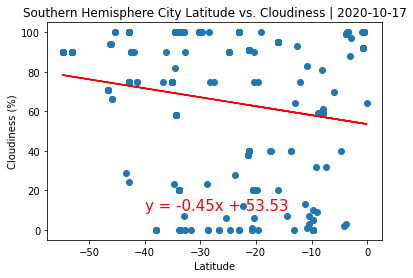

In [23]:
# Build a scatter plot for each data type
plt.scatter(cities_south_df["Latitude"], cities_south_df["Cloudiness %"], marker="o")

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness | {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_south_df["Latitude"]
y_values = cities_south_df["Cloudiness %"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/SH_Latitude_VS_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13672021631092726


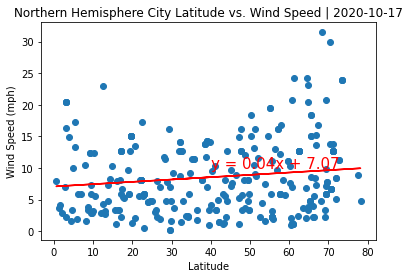

In [19]:
# Build a scatter plot for each data type
plt.scatter(cities_north_df["Latitude"], cities_north_df["Wind Speed (mph)"], marker="o")

# Incorporate the other graph properties
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed | {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_north_df["Latitude"]
y_values = cities_north_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/NH_Latitude_VS_Wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.29158868989308273


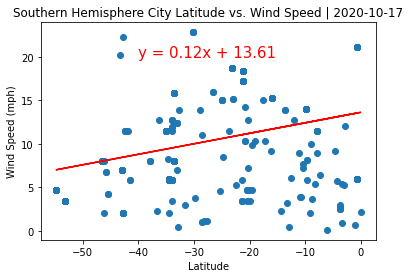

In [22]:
# Build a scatter plot for each data type
plt.scatter(cities_south_df["Latitude"], cities_south_df["Wind Speed (mph)"], marker="o")

# Incorporate the other graph properties
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed | {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Add the linear regression equation and line to plot
x_values = cities_south_df["Latitude"]
y_values = cities_south_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

# Print the r value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("Images/SH_Latitude_VS_Wind.png")

## Final Observations

1. Of the four weather points analyzed, temperature has the strongest correlation to latitude (as shown by r-value's closest to 1 or -1). In this case, both show that the temperature gets warmer as you move closer to the equator. This is shown by a strong negative correlation in the northern hemisphere (as latitude goes up, temperature goes down) and a strong positive correlation in the southern hemisphere (as latitude goes up, temperature goes up).
2. There appears to be no correlation between latitude and neither humidity nor cloudiness for either hemisphere. Both humidity and cloudiness are related closely with moisture in the air, so this is not a surprising result.
3. Finally, our data shows no correlation between latitude and wind speed for the northern hemisphere; however, while there also appears to be no correlation between latitude and wind speed in the southern hemisphere, it is right on the cusp of a weak correlation. Because the wind speed changes daily and the random city generator will always provide a new list of cities to sample, latitude vs. wind speed should be tested on more dates before determining the possibility of correlation.